In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("Eye_Data_Set/Closed_Eye/s0001_00007_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

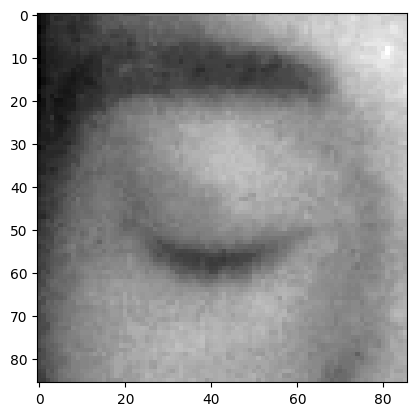

In [4]:
Datadirectory = "Eye_Data_Set/"
classes = ["Closed_Eye", "Open_Eye"]
for category in classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

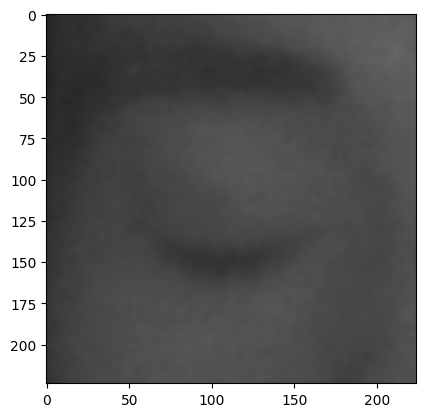

In [5]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

Converting all the images into an Array for data and labels

In [6]:
training_data = []

def create_training_data():
    for category in classes:
        path = os.path.join(Datadirectory, category)
        class_num  = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_data.append([new_array, class_num])
            except  exception as e:
                pass

In [7]:
create_training_data()

In [8]:
len(training_data)

3024

In [9]:
import random

random.shuffle(training_data)

In [10]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [11]:
X.shape

(3024, 224, 224, 3)

In [12]:
X = X/255.0

In [13]:
y = np.array(Y)

CNN Model Transfer learning and training the model

In [14]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [15]:
model = tf.keras.applications.mobilenet.MobileNet()

In [16]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [17]:
base_input = model.layers[0].input

In [18]:
base_output = model.layers[-4].output

In [19]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_op = layers.Activation('sigmoid')(final_output)

In [22]:
new_model = keras.Model(inputs= base_input, outputs= final_op)

In [23]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

Binary Classification

In [24]:
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [25]:
new_model.fit(X,y, epochs=20, validation_split=0.1)

Epoch 1/20


86/86 [==============================] - 183s 2s/step - loss: 0.1846 - accuracy: 0.9419 - val_loss: 1.0239 - val_accuracy: 0.8284
Epoch 2/20
86/86 [==============================] - 177s 2s/step - loss: 0.0653 - accuracy: 0.9732 - val_loss: 0.1208 - val_accuracy: 0.9406
Epoch 3/20
86/86 [==============================] - 174s 2s/step - loss: 0.0489 - accuracy: 0.9798 - val_loss: 0.3638 - val_accuracy: 0.9043
Epoch 4/20
86/86 [==============================] - 174s 2s/step - loss: 0.0331 - accuracy: 0.9857 - val_loss: 0.0413 - val_accuracy: 0.9868
Epoch 5/20
86/86 [==============================] - 174s 2s/step - loss: 0.0135 - accuracy: 0.9941 - val_loss: 0.1549 - val_accuracy: 0.9406
Epoch 6/20
86/86 [==============================] - 172s 2s/step - loss: 0.0100 - accuracy: 0.9960 - val_loss: 0.0617 - val_accuracy: 0.9868
Epoch 7/20
86/86 [==============================] - 170s 2s/step - loss: 0.0593 - accuracy: 0.9768 - val_loss: 0.1234 - val_accuracy: 0.9538
Epoch 8/20


In [26]:
new_model.save('transferCNN.h5')

c:\Users\tanishq.000\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
